In [4]:
#Duration is our time to event( customer churn or inactivity)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt




In [5]:
pip install pandas seaborn numpy matplotlib openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install lifelines


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Private\Downloads\Assignment 4 2025.csv")
df.head(10)



,custid,retained,created,firstorder,lastorder,support_tickets,payment_delays,total_spend,industry_type,supplier_engagement,duration,censor
0,1,1,02/08/2022,18/01/2023,15/12/2023,6,11,31209.02,Machinery,Low,882,0
1,2,0,17/08/2019,06/12/2019,06/12/2021,19,18,38663.29,Automotive,High,900,1
2,3,1,21/02/2019,16/08/2019,24/12/2021,14,43,41529.64,Automotive,Low,900,1
3,4,1,17/07/2020,16/08/2020,18/12/2022,10,58,34541.54,Automotive,Low,900,1
4,5,0,16/05/2020,18/08/2020,01/06/2022,7,48,10764.31,Aerospace,Low,900,1
5,6,1,02/04/2020,26/08/2020,08/06/2022,6,60,20222.04,Energy,Medium,900,1
6,7,0,13/10/2019,28/01/2020,16/11/2020,18,16,46763.76,Automotive,Medium,900,1
7,8,1,29/07/2019,28/10/2019,03/01/2022,10,73,15107.70,Electronics,Low,900,1
8,9,0,17/10/2022,05/04/2023,26/07/2023,10,56,21747.52,Automotive,Medium,806,0
9,10,0,21/01/2022,04/06/2022,22/03/2024,3,54,24443.46,Energy,Low,900,1


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df['event'] = 1 - df['censor']
numeric_cols = ['support_tickets', 'payment_delays', 'total_spend']
categorical_cols = ['industry_type', 'supplier_engagement']

X_numeric = df[numeric_cols].values
X_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)
feature_names = numeric_cols + X_categorical.columns.tolist()
X= np.hstack((X_numeric, X_categorical.values)).astype('float32')
X_df = pd.DataFrame(X, columns=feature_names, index=df.index)

df_exp = pd.DataFrame({
    'Duration': df['duration'].astype('float32'),
    'Event': df['event'].astype('float32')
}, index=df.index)

df_exp= pd.concat([df_exp, X_df], axis=1)
df_exp.head(10)

,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0
1,900.0,0.0,19.0,18.0,38663.289062,1.0,0.0,0.0,0.0,0.0,0.0
2,900.0,0.0,14.0,43.0,41529.640625,1.0,0.0,0.0,0.0,1.0,0.0
3,900.0,0.0,10.0,58.0,34541.539062,1.0,0.0,0.0,0.0,1.0,0.0
4,900.0,0.0,7.0,48.0,10764.309570,0.0,0.0,0.0,0.0,1.0,0.0
5,900.0,0.0,6.0,60.0,20222.039062,0.0,0.0,1.0,0.0,0.0,1.0
6,900.0,0.0,18.0,16.0,46763.761719,1.0,0.0,0.0,0.0,0.0,1.0
7,900.0,0.0,10.0,73.0,15107.700195,0.0,1.0,0.0,0.0,1.0,0.0
8,806.0,1.0,10.0,56.0,21747.519531,1.0,0.0,0.0,0.0,0.0,1.0
9,900.0,0.0,3.0,54.0,24443.460938,0.0,0.0,1.0,0.0,1.0,0.0


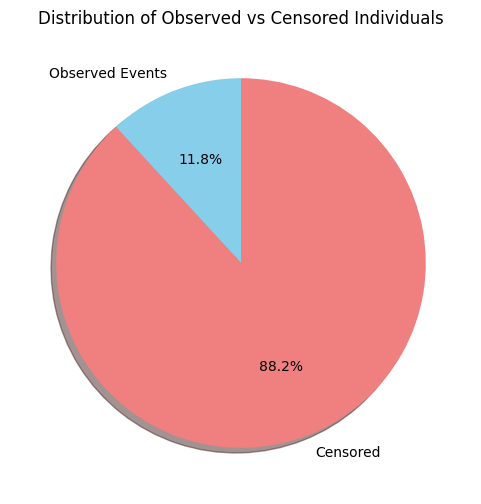

In [6]:
observed_count= (df_exp["Event"]==1).sum()
censored_count =(df_exp["Event"]==0).sum()
labels = ['Observed Events', 'Censored']
sizes = [observed_count, censored_count]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Observed vs Censored Individuals')
plt.show()

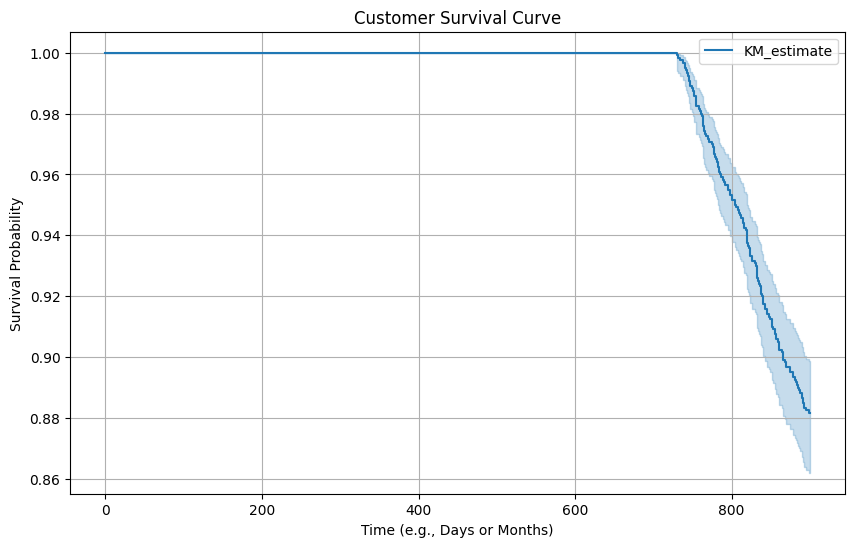

In [7]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Define duration and event variables
duration = df_exp["Duration"]
event = df_exp["Event"]

# Create the Kaplan-Meier estimator object
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=duration, event_observed=event)

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Customer Survival Curve")
plt.xlabel("Time (e.g., Days or Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

WEIBULL AFT MODEL

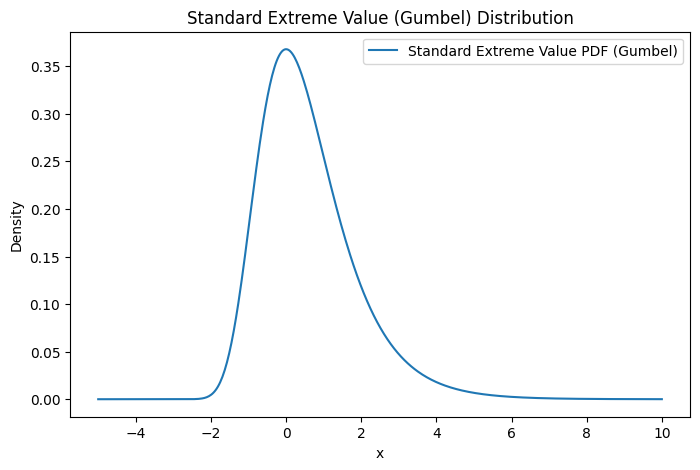

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r  # right-skewed Gumbel

# Generate x values
x = np.linspace(-5, 10, 500)

# Compute PDF for the standard case (loc=0, scale=1)
pdf = gumbel_r.pdf(x, loc=0, scale=1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, pdf, label='Standard Extreme Value PDF (Gumbel)')
plt.title("Standard Extreme Value (Gumbel) Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


In [8]:
from lifelines import WeibullAFTFitter

df_exp["Duration"] = df_exp["Duration"].apply(lambda x: x if x > 0 else 0.1)
predictors = feature_names


# === 9. Fit the Weibull AFT Model ===
aft = WeibullAFTFitter()
aft.fit(df_exp, duration_col="Duration", event_col="Event")#, formula=" + ".join(predictors))
print(aft.summary)

                                            coef    exp(coef)      se(coef)  \
param   covariate                                                             
lambda_ industry_type_Automotive   -1.307755e-02     0.987008  2.387375e-02   
        industry_type_Electronics  -5.760483e-03     0.994256  2.591831e-02   
        industry_type_Energy        1.065520e-02     1.010712  3.668766e-02   
        industry_type_Machinery     1.810146e-03     1.001812  2.716154e-02   
        payment_delays              3.929670e-04     1.000393  3.186882e-04   
        supplier_engagement_Low     5.650965e-02     1.058137  2.085228e-02   
        supplier_engagement_Medium  6.058959e-02     1.062463  2.131196e-02   
        support_tickets             6.971851e-04     1.000697  1.389697e-03   
        total_spend                 5.936391e-07     1.000001  6.382240e-07   
        Intercept                   6.924982e+00  1017.375542  3.627113e-02   
rho_    Intercept                   2.324282e+00    

In [9]:
df_exp.head()

,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0
1,900.0,0.0,19.0,18.0,38663.289062,1.0,0.0,0.0,0.0,0.0,0.0
2,900.0,0.0,14.0,43.0,41529.640625,1.0,0.0,0.0,0.0,1.0,0.0
3,900.0,0.0,10.0,58.0,34541.539062,1.0,0.0,0.0,0.0,1.0,0.0
4,900.0,0.0,7.0,48.0,10764.309570,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df_uncensored = df_exp[df_exp["Event"] == 1].copy()
df_uncensored


,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0
8,806.0,1.0,10.0,56.0,21747.519531,1.0,0.0,0.0,0.0,0.0,1.0
23,861.0,1.0,14.0,24.0,16350.849609,0.0,0.0,1.0,0.0,0.0,1.0
24,755.0,1.0,18.0,81.0,38976.890625,0.0,1.0,0.0,0.0,0.0,0.0
33,762.0,1.0,17.0,9.0,47182.460938,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1165,763.0,1.0,2.0,10.0,18940.449219,1.0,0.0,0.0,0.0,0.0,1.0
1174,747.0,1.0,2.0,4.0,45773.921875,0.0,1.0,0.0,0.0,0.0,0.0
1177,832.0,1.0,16.0,9.0,7332.609863,1.0,0.0,0.0,0.0,0.0,1.0
1178,856.0,1.0,12.0,37.0,29698.640625,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
dur_pred_wei=aft.predict_percentile(df_uncensored, p=0.5)

In [12]:
unc_dur_pred_wei=pd.DataFrame({"Observed": df_uncensored["Duration"].values,"Predicted":dur_pred_wei.values})

In [13]:
unc_dur_pred_wei

,Observed,Predicted
0,882.0,1068.989834
1,806.0,1073.325643
2,861.0,1084.918398
3,755.0,1044.062201
4,762.0,1074.947614
...,...,...
137,763.0,1046.489843
138,747.0,1005.757140
139,832.0,1049.084956
140,856.0,1071.875588


In [14]:
weiunc_df=unc_dur_pred_wei.sort_values(by=["Observed","Predicted"], ascending=True)

In [15]:
weiunc_df

,Observed,Predicted
81,730.0,1075.478329
25,731.0,1071.722100
106,734.0,1073.401607
133,738.0,1030.771325
60,740.0,1077.747687
...,...,...
12,891.0,1060.380878
49,892.0,1002.038813
48,893.0,1068.413598
73,895.0,1087.029421


In [16]:
weiunc_df=weiunc_df.reset_index(drop=True)

In [17]:

weiunc_df                                                          

,Observed,Predicted
0,730.0,1075.478329
1,731.0,1071.722100
2,734.0,1073.401607
3,738.0,1030.771325
4,740.0,1077.747687
...,...,...
137,891.0,1060.380878
138,892.0,1002.038813
139,893.0,1068.413598
140,895.0,1087.029421


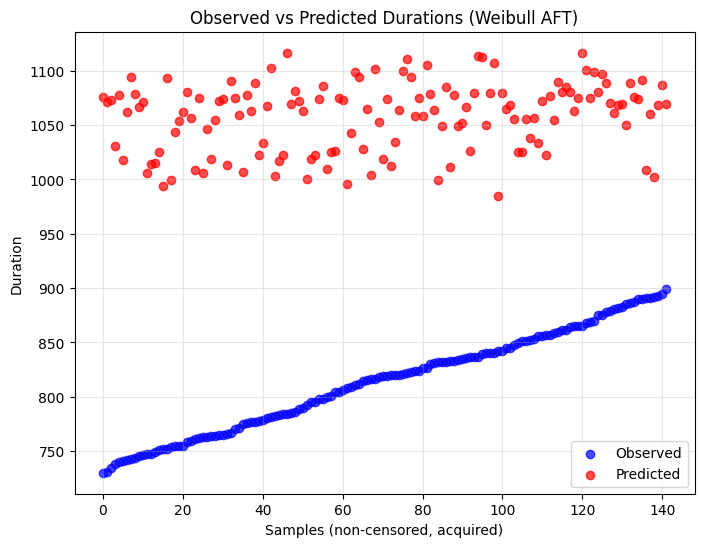

In [18]:
import matplotlib.pyplot as plt

# Plot observed vs predicted on the same plane
plt.figure(figsize=(8, 6))
plt.scatter(weiunc_df.index, weiunc_df["Observed"], color='blue', alpha=0.7, label='Observed')
plt.scatter(weiunc_df.index, weiunc_df["Predicted"], color='red', alpha=0.7, label='Predicted')

plt.title("Observed vs Predicted Durations (Weibull AFT)")
plt.xlabel("Samples (non-censored, acquired)")
plt.ylabel("Duration")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
# Calculate MSE, MAD, MAPE
w_mse = np.mean((weiunc_df['Observed'] - weiunc_df['Predicted'])**2)
print(f'Mean Squared Error (MSE): {w_mse:.4f}')
w_mad = np.mean(np.abs(weiunc_df['Observed'] - weiunc_df['Predicted']))
print(f'Mean Absolute Deviation (MAD): {w_mad:.4f}')
w_mape = np.mean(np.abs((weiunc_df['Observed'] - weiunc_df['Predicted']) / weiunc_df['Observed']))
print(f'Mean Absolute Percentage Error (MAPE): {w_mape*100:.4f}%')



Mean Squared Error (MSE): 62152.5843
Mean Absolute Deviation (MAD): 244.2036
Mean Absolute Percentage Error (MAPE): 30.3767%


In [20]:
wei_aft_data= df_exp.copy()

In [21]:
wei_aft_data["Predicted_time"]= aft.predict_percentile(wei_aft_data, p=0.5)

In [22]:
wei_aft_data

,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium,Predicted_time
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0,1068.989834
1,900.0,0.0,19.0,18.0,38663.289062,1.0,0.0,0.0,0.0,0.0,0.0,1011.623127
2,900.0,0.0,14.0,43.0,41529.640625,1.0,0.0,0.0,0.0,1.0,0.0,1079.076491
3,900.0,0.0,10.0,58.0,34541.539062,1.0,0.0,0.0,0.0,1.0,0.0,1077.951983
4,900.0,0.0,7.0,48.0,10764.309570,0.0,0.0,0.0,0.0,1.0,0.0,1070.369762
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,900.0,0.0,4.0,20.0,33878.050781,0.0,1.0,0.0,0.0,1.0,0.0,1064.888680
1196,900.0,0.0,11.0,35.0,35216.558594,0.0,0.0,0.0,0.0,0.0,1.0,1087.933563
1197,900.0,0.0,11.0,11.0,33452.699219,1.0,0.0,0.0,0.0,0.0,1.0,1062.605838
1198,900.0,0.0,18.0,1.0,13954.650391,0.0,0.0,0.0,1.0,0.0,1.0,1067.145948


In [23]:
from lifelines.utils import concordance_index
w_CIndex= concordance_index(event_times= wei_aft_data["Duration"], predicted_scores= wei_aft_data["Predicted_time"], event_observed= wei_aft_data["Event"] )
print(f"C-index (Weibull AFT): {w_CIndex:.4f}")

C-index (Weibull AFT): 0.5873


LOGNORMAL AFT MODEL

In [24]:
from lifelines import LogNormalAFTFitter
df_exp["Duration"] = df_exp["Duration"].apply(lambda x: x if x > 0 else 0.1)
predictors = feature_names


normal = LogNormalAFTFitter()
normal.fit(df_exp, duration_col="Duration", event_col="Event")# formula=" + ".join(predictors))
print(normal.summary)


                                           coef    exp(coef)      se(coef)  \
param  covariate                                                             
mu_    industry_type_Automotive   -1.680837e-02     0.983332  2.499800e-02   
       industry_type_Electronics  -6.713285e-03     0.993309  2.721350e-02   
       industry_type_Energy       -2.639473e-04     0.999736  3.671629e-02   
       industry_type_Machinery    -1.132615e-03     0.998868  2.816260e-02   
       payment_delays              5.104410e-04     1.000511  3.306083e-04   
       supplier_engagement_Low     6.707904e-02     1.069380  2.228103e-02   
       supplier_engagement_Medium  6.871468e-02     1.071131  2.262967e-02   
       support_tickets             5.230119e-04     1.000523  1.457474e-03   
       total_spend                 6.090115e-07     1.000001  6.701820e-07   
       Intercept                   6.932649e+00  1025.206037  3.963317e-02   
sigma_ Intercept                  -1.677960e+00     0.186755  7.

In [25]:
dur_pred_norm=normal.predict_percentile(df_uncensored, p=0.5)

In [26]:
unc_dur_pred_norm=pd.DataFrame({"Observed": df_uncensored["Duration"].values,"Predicted":dur_pred_norm.values})

In [27]:
unc_dur_pred_norm

,Observed,Predicted
0,882.0,1125.919017
1,806.0,1131.856515
2,861.0,1130.743005
3,755.0,1097.108002
4,762.0,1126.392159
...,...,...
137,763.0,1099.093005
138,747.0,1050.372592
139,832.0,1098.809935
140,856.0,1127.552311


In [28]:
sum(unc_dur_pred_norm['Observed']==900)

0

In [29]:
normunc_df=unc_dur_pred_norm.sort_values(by=["Observed","Predicted"], ascending=True)

In [30]:
normunc_df

,Observed,Predicted
81,730.0,1130.201854
25,731.0,1134.527768
106,734.0,1134.233345
133,738.0,1080.398651
60,740.0,1134.736639
...,...,...
12,891.0,1117.414706
49,892.0,1048.477455
48,893.0,1136.621952
73,895.0,1155.050897


In [31]:
normunc_df=normunc_df.reset_index(drop=True)

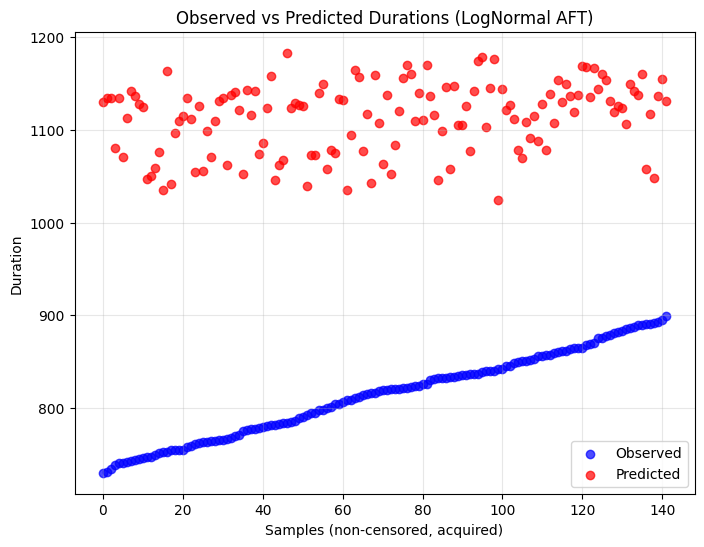

In [32]:
import matplotlib.pyplot as plt

# Plot observed vs predicted on the same plane
plt.figure(figsize=(8, 6))
plt.scatter(normunc_df.index, normunc_df["Observed"], color='blue', alpha=0.7, label='Observed')
plt.scatter(normunc_df.index, normunc_df["Predicted"], color='red', alpha=0.7, label='Predicted')

plt.title("Observed vs Predicted Durations (LogNormal AFT)")
plt.xlabel("Samples (non-censored, acquired)")
plt.ylabel("Duration")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
# Calculate MSE, MAD, MAPE
n_mse = np.mean((normunc_df['Observed'] - normunc_df['Predicted'])**2)
print(f'Mean Squared Error (MSE): {n_mse:.4f}')
n_mad = np.mean(np.abs(normunc_df['Observed'] - normunc_df['Predicted']))
print(f'Mean Absolute Deviation (MAD): {n_mad:.4f}')
n_mape = np.mean(np.abs((normunc_df['Observed'] - normunc_df['Predicted']) / normunc_df['Observed']))
print(f'Mean Absolute Percentage Error (MAPE): {n_mape*100:.4f}%')


Mean Squared Error (MSE): 92554.6282
Mean Absolute Deviation (MAD): 299.7192
Mean Absolute Percentage Error (MAPE): 37.2017%


In [34]:
norm_aft_data= df_exp.copy()

In [35]:
norm_aft_data["Predicted_time"]= normal.predict_percentile(df_exp, p=0.5)

In [36]:
norm_aft_data

,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium,Predicted_time
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0,1125.919017
1,900.0,0.0,19.0,18.0,38663.289062,1.0,0.0,0.0,0.0,0.0,0.0,1052.066983
2,900.0,0.0,14.0,43.0,41529.640625,1.0,0.0,0.0,0.0,1.0,0.0,1138.518020
3,900.0,0.0,10.0,58.0,34541.539062,1.0,0.0,0.0,0.0,1.0,0.0,1140.009012
4,900.0,0.0,7.0,48.0,10764.309570,0.0,0.0,0.0,0.0,1.0,0.0,1135.065646
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,900.0,0.0,4.0,20.0,33878.050781,0.0,1.0,0.0,0.0,1.0,0.0,1125.460576
1196,900.0,0.0,11.0,35.0,35216.558594,0.0,0.0,0.0,0.0,0.0,1.0,1148.749706
1197,900.0,0.0,11.0,11.0,33452.699219,1.0,0.0,0.0,0.0,0.0,1.0,1114.650579
1198,900.0,0.0,18.0,1.0,13954.650391,0.0,0.0,0.0,1.0,0.0,1.0,1117.281908


In [37]:
n_CIndex= concordance_index(event_times= norm_aft_data["Duration"], predicted_scores= norm_aft_data["Predicted_time"], event_observed= norm_aft_data["Event"] )
print(f"C-index (Log-Normal AFT): {n_CIndex:.4f}")

C-index (Log-Normal AFT): 0.5893


LOGLOGISTIC AFT MODEL

In [38]:
from lifelines import LogLogisticAFTFitter

df_exp["Duration"] = df_exp["Duration"].apply(lambda x: x if x > 0 else 0.1)
predictors = feature_names

logistic = LogLogisticAFTFitter()
logistic.fit(df_exp, duration_col="Duration", event_col="Event")# formula=" + ".join(predictors))
print(logistic.summary)


                                           coef   exp(coef)      se(coef)  \
param  covariate                                                            
alpha_ industry_type_Automotive   -1.390965e-02    0.986187  2.443975e-02   
       industry_type_Electronics  -5.278911e-03    0.994735  2.656227e-02   
       industry_type_Energy        8.857964e-03    1.008897  3.727369e-02   
       industry_type_Machinery     1.408438e-03    1.001409  2.775420e-02   
       payment_delays              4.264346e-04    1.000427  3.257218e-04   
       supplier_engagement_Low     6.097067e-02    1.062868  2.154538e-02   
       supplier_engagement_Medium  6.441518e-02    1.066535  2.198756e-02   
       support_tickets             6.269714e-04    1.000627  1.422130e-03   
       total_spend                 6.242145e-07    1.000001  6.564339e-07   
       Intercept                   6.904962e+00  997.210199  3.739147e-02   
beta_  Intercept                   2.366218e+00   10.657010  8.039158e-02   

In [39]:
dur_pred_log=logistic.predict_percentile(df_uncensored, p=0.5)

In [40]:
unc_dur_pred_log=pd.DataFrame({"Observed": df_uncensored["Duration"].values,"Predicted":dur_pred_log.values})

In [41]:
unc_dur_pred_log

,Observed,Predicted
0,882.0,1091.463158
1,806.0,1095.747745
2,861.0,1104.837110
3,755.0,1064.051743
4,762.0,1095.992379
...,...,...
137,763.0,1067.215611
138,747.0,1023.737164
139,832.0,1068.395946
140,856.0,1093.684086


In [42]:
logunc_df=unc_dur_pred_log.sort_values(by=["Observed","Predicted"], ascending=True)

In [43]:
logunc_df

,Observed,Predicted
81,730.0,1097.492056
25,731.0,1096.080629
106,734.0,1097.322706
133,738.0,1049.053060
60,740.0,1100.539846
...,...,...
12,891.0,1082.517326
49,892.0,1020.176668
48,893.0,1093.739520
73,895.0,1112.035671


In [44]:
logunc_df=logunc_df.reset_index(drop=True)

In [45]:
logunc_df

,Observed,Predicted
0,730.0,1097.492056
1,731.0,1096.080629
2,734.0,1097.322706
3,738.0,1049.053060
4,740.0,1100.539846
...,...,...
137,891.0,1082.517326
138,892.0,1020.176668
139,893.0,1093.739520
140,895.0,1112.035671


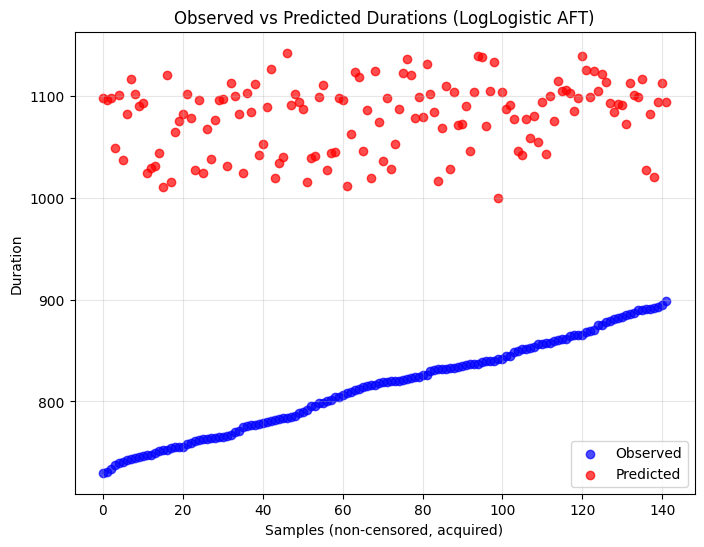

In [46]:
import matplotlib.pyplot as plt

# Plot observed vs predicted on the same plane
plt.figure(figsize=(8, 6))
plt.scatter(logunc_df.index, logunc_df["Observed"], color='blue', alpha=0.7, label='Observed')
plt.scatter(logunc_df.index, logunc_df["Predicted"], color='red', alpha=0.7, label='Predicted')

plt.title("Observed vs Predicted Durations (LogLogistic AFT)")
plt.xlabel("Samples (non-censored, acquired)")
plt.ylabel("Duration")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [47]:
# Calculate MSE, MAD, MAPE
l_mse = np.mean((logunc_df['Observed'] - logunc_df['Predicted'])**2)
print(f'Mean Squared Error (MSE): {l_mse:.4f}')
l_mad = np.mean(np.abs(logunc_df['Observed'] - logunc_df['Predicted']))
print(f'Mean Absolute Deviation (MAD): {l_mad:.4f}')
l_mape = np.mean(np.abs((logunc_df['Observed'] - logunc_df['Predicted']) / logunc_df['Observed']))
print(f'Mean Absolute Percentage Error (MAPE): {l_mape*100:.4f}%')

Mean Squared Error (MSE): 73145.0729
Mean Absolute Deviation (MAD): 265.5879
Mean Absolute Percentage Error (MAPE): 33.0063%


In [48]:
log_aft_data= df_exp.copy()

In [49]:
log_aft_data

,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0
1,900.0,0.0,19.0,18.0,38663.289062,1.0,0.0,0.0,0.0,0.0,0.0
2,900.0,0.0,14.0,43.0,41529.640625,1.0,0.0,0.0,0.0,1.0,0.0
3,900.0,0.0,10.0,58.0,34541.539062,1.0,0.0,0.0,0.0,1.0,0.0
4,900.0,0.0,7.0,48.0,10764.309570,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1195,900.0,0.0,4.0,20.0,33878.050781,0.0,1.0,0.0,0.0,1.0,0.0
1196,900.0,0.0,11.0,35.0,35216.558594,0.0,0.0,0.0,0.0,0.0,1.0
1197,900.0,0.0,11.0,11.0,33452.699219,1.0,0.0,0.0,0.0,0.0,1.0
1198,900.0,0.0,18.0,1.0,13954.650391,0.0,0.0,0.0,1.0,0.0,1.0


In [50]:
log_aft_data["Predicted_time"]= logistic.predict_percentile(log_aft_data, p=0.5)

In [51]:
log_aft_data

,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium,Predicted_time
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0,1091.463158
1,900.0,0.0,19.0,18.0,38663.289062,1.0,0.0,0.0,0.0,0.0,0.0,1027.387446
2,900.0,0.0,14.0,43.0,41529.640625,1.0,0.0,0.0,0.0,1.0,0.0,1102.196513
3,900.0,0.0,10.0,58.0,34541.539062,1.0,0.0,0.0,0.0,1.0,0.0,1101.674811
4,900.0,0.0,7.0,48.0,10764.309570,0.0,0.0,0.0,0.0,1.0,0.0,1093.905010
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,900.0,0.0,4.0,20.0,33878.050781,0.0,1.0,0.0,0.0,1.0,0.0,1088.806139
1196,900.0,0.0,11.0,35.0,35216.558594,0.0,0.0,0.0,0.0,0.0,1.0,1111.183944
1197,900.0,0.0,11.0,11.0,33452.699219,1.0,0.0,0.0,0.0,0.0,1.0,1083.483116
1198,900.0,0.0,18.0,1.0,13954.650391,0.0,0.0,0.0,1.0,0.0,1.0,1087.033615


In [53]:
l_CIndex= concordance_index(event_times=log_aft_data["Duration"], predicted_scores= log_aft_data["Predicted_time"], event_observed= log_aft_data["Event"] )
print(f"C-index (Log-Logistic AFT): {l_CIndex:.4f}")                                                                                                          

C-index (Log-Logistic AFT): 0.5883


In [55]:
logistic.AIC_

np.float64(2414.3047075016098)

In [66]:
# Define predictors
predictors = ['support_tickets', 'payment_delays', 'total_spend'] + \
             [col for col in df_exp.columns if 'industry_type_' in col or 'supplier_engagement_' in col]

# Fit models with and without ancillary
models = {
    'Weibull': WeibullAFTFitter(),
    'Log-Normal': LogNormalAFTFitter(),
    'Log-Logistic': LogLogisticAFTFitter()
}
results = {}

for name, model in models.items():
    # With ancillary
    model.fit(df_exp, duration_col='Duration', event_col='Event')
    predicted_times = model.predict_expectation(df_exp[predictors])
    c_index = concordance_index(df_exp['Duration'], predicted_times, df_exp['Event'])
    event_mask = df_exp['Event'] == 1
    observed_times = df_exp.loc[event_mask, 'Duration']
    predicted_times_event = predicted_times[event_mask]
    absolute_errors = np.abs(observed_times - predicted_times_event)
    mad = np.mean(np.abs(df_exp.loc[event_mask, 'Duration'] - predicted_times[event_mask]))
    mape = np.mean(np.abs((observed_times - predicted_times_event) / observed_times)) * 100 
    results[name] = {
        'AIC': model.AIC_,
        'BIC': model.BIC_,
        'Concordance Index': c_index,
        'MAPE (Event=1)': mape,
        'MAD (Event=1)': mad,
        'Predicted Times': predicted_times
    }
    


# Print comparison

print(pd.DataFrame({
        'Model': results.keys(),
        'AIC': [results[m]['AIC'] for m in results],
        'BIC': [results[m]['BIC'] for m in results],
        'Concordance Index': [results[m]['Concordance Index'] for m in results],
        'MAPE (Event=1)': [results[m]['MAPE (Event=1)'] for m in results],
        'MAD (Event=1)': [results[m]['MAD (Event=1)'] for m in results]
    }).round(3))


          Model       AIC       BIC  Concordance Index  MAPE (Event=1)  \
0       Weibull  2417.763  2409.943              0.587          28.681   
1    Log-Normal  2398.576  2390.756              0.589          39.615   
2  Log-Logistic  2414.305  2406.485              0.588          34.952   

   MAD (Event=1)  
0        230.436  
1        319.312  
2        281.385  


In [63]:
aft.AIC_
logistic.AIC_

np.float64(2414.3047075016098)

In [67]:
aft.concordance_index_

np.float64(0.5873474610655098)